<a href="https://colab.research.google.com/github/Joan-Wangare/Baristo/blob/main/DBSCAN%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOOGLE COLAB WORKSPACE LINK: https://colab.research.google.com/drive/1jNmpru0UkHgdspz47jgSKDPOedktFDY5?usp=sharing**

GROUP 10 [DBSCAN ALGORITHM CLUSTERING]

MEMBER:

1. Joan Wangare - 18/05481
2. Brian kipruto - 18/02422
3. Samuel Gicho - 18/03385
4. Moses Njenga - 18/04314
5. Kezia Gatonye - 18/03787
6. Broline Nyakundi -18/02390
7. Peter Lemashon - 18/03097

**Importing the required libraries & dataset**

In [ ]:
import numpy as np 
import io
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


**Checking the head of the data**

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Checking the shape of the dataset**

In [ ]:
print(" Dataset shape; ", data.shape)

 Dataset shape;  (20640, 10)


**Check if the dataset has any missing values**

In [ ]:
data.isnull().any().any

<bound method NDFrame._add_numeric_operations.<locals>.any of longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool>

*Since our data is ready to use, let us extract any two columns and apply our DBSCAN model to them*

In [16]:
# extracting the above mentioned columns
x = data.loc[:, ['households', 
             'total_rooms']].values

In [17]:
# check the shape of x
print(x.shape)

(20640, 2)


**Compute data proximity from each other using Nearest Neighbours**

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x)
distances,indices=nbrs.kneighbors(x)

**Sorting and plot the distances between the data points**

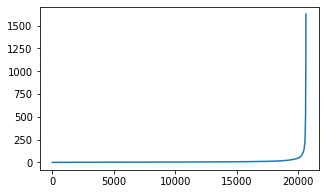

In [ ]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

**Implementing the DBSCAN model from sklearn.cluster import DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 8, min_samples= 4).fit(x)
labels = dbscan.labels_

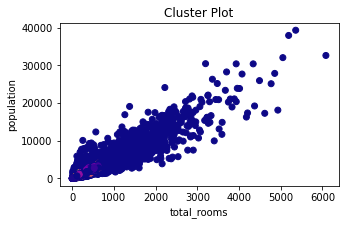

In [18]:
plt.scatter(x[:, 0], x[:, 1], c = labels, cmap = "plasma")
plt.title('Cluster Plot')
plt.xlabel("total_rooms")
plt.ylabel("population")
plt.show()